In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from IPython import display
display.set_matplotlib_formats('svg')

/var/folders/nn/4_714bpd2qz7gm9d27_r3qw40000gn/T/ipykernel_20168/1486872274.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


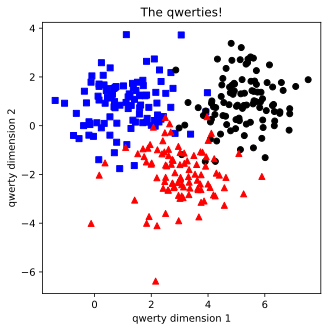

In [30]:
# create data

nPerClust = 100
blur = 1

A = [  1,  1 ]
B = [  5,  1 ]
C = [  3, -2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),1+np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [31]:
data.shape

torch.Size([300, 2])

In [44]:
def createModel(learningRate):
    ANNclassify = nn.Sequential(
        nn.Linear(2, 4),
        nn.ReLU(),
        nn.Linear(4, 3),
        nn.Softmax(dim = 1)
    )
    
    lossfun = nn.CrossEntropyLoss()
    
    optimizer = torch.optim.SGD(ANNclassify.parameters(), lr = learningRate)
    return ANNclassify, lossfun, optimizer

In [59]:
numepochs = 1000
def trainModel(ANNmodel):
    losses = torch.zeros(numepochs)
    ongoingAcc = []
    for epochi in range(numepochs):
        yHat = ANNmodel(data)
        
        loss = lossfun(yHat, labels)
        losses[epochi] = loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        predictions = torch.argmax(yHat, axis = 1) == labels
        prednums = predictions.float()
        accuracy = 100*torch.mean(prednums)
        ongoingAcc.append(accuracy)
    
    predictions = ANNmodel(data)
    predlabels = torch.argmax(predictions,axis=1)
    totalacc = 100*torch.mean((predlabels == labels).float()) 
    
    return losses, totalacc, ongoingAcc, yHat

In [60]:
ANNclassify, lossfun, optimizer = createModel(0.5)
losses, totalacc, ongoingAcc, yHat = trainModel(ANNclassify)
print(f'Total accuracy is: {totalacc:.2f}')

Total accuracy is: 94.00


Final accuracy: 94%


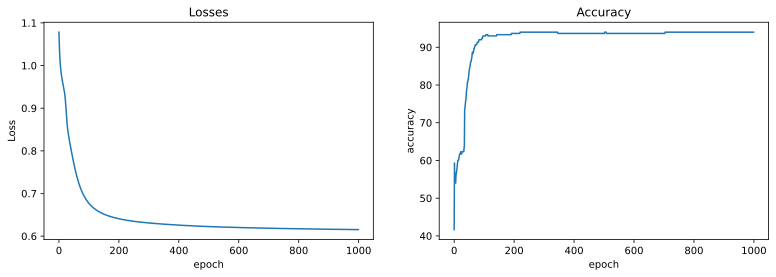

In [61]:
# report accuracy
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

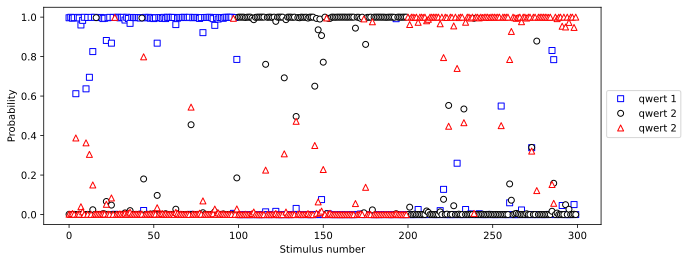

In [62]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

colorshape = [  'bs','ko','r^' ]
for i in range(3):
  plt.plot(yHat[:,i].detach(),colorshape[i],markerfacecolor='w')

plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['qwert 1','qwert 2','qwert 2'],loc=(1.01,.4))
plt.show()